In [1]:
#Importing data preprocessing libraries 
import pandas as pd
import numpy as np

#Turning off warning messages
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Importing visualization libraries 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

#Importing machine learning libs 
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import plot_precision_recall_curve,plot_roc_curve
from sklearn.metrics import classification_report



In [2]:
df = pd.read_csv('mtn.csv')

In [3]:
df

,Unnamed: 0,Time,Date,Latitude,Longitude,Call Established/Calldrop,Timing Advance,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,107,27:41.0,2/18/2022,7.302863,5.149358,Call Established,NaN,-79.699997,-15.7,-63.900002
1,132,28:26.5,2/18/2022,7.301352,5.151550,Dropped Call,NaN,NaN,NaN,NaN
2,214,32:25.0,2/18/2022,7.287465,5.165219,Call Established,NaN,-69.199997,-8.7,-60.799999
3,237,33:07.0,2/18/2022,7.286134,5.168570,Dropped Call,2.0,-68.000000,3.3,NaN
4,458,39:41.0,2/18/2022,7.281025,5.191569,Call Established,NaN,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...,...,...,...
165,17831,26:53.0,2/24/2022,7.267527,5.161787,Call Established,NaN,-68.599998,3.0,NaN
166,17981,31:35.0,2/24/2022,7.275255,5.152578,Call Established,NaN,-69.400002,3.2,NaN
167,18110,35:35.0,2/24/2022,7.286213,5.153009,Call Established,NaN,-66.900002,3.9,NaN
168,18237,39:33.0,2/24/2022,7.296255,5.149453,Call Established,NaN,-63.900002,3.5,NaN


In [4]:
df.describe()

,Unnamed: 0,Latitude,Longitude,Timing Advance,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
count,170.000000,170.000000,170.000000,18.000000,164.000000,163.000000,88.000000
mean,9062.352941,7.279708,5.184207,1.138889,-73.208536,-5.233742,-62.926136
std,5152.015229,0.021872,0.046495,0.782258,9.578801,8.143878,8.673801
min,107.000000,7.235494,5.102670,0.000000,-99.800003,-21.600000,-83.699997
25%,4803.250000,7.263116,5.149582,0.625000,-79.475000,-12.250000,-67.525002
50%,9182.000000,7.279680,5.168292,1.000000,-72.350002,-6.100000,-61.750000
75%,13171.250000,7.296117,5.218253,1.500000,-67.225002,3.000000,-57.325001
max,18366.000000,7.362015,5.295605,3.000000,-49.599998,5.900000,-47.799999


In [5]:
df.isnull().sum()

Unnamed: 0                                  0
Time                                        0
Date                                        0
Latitude                                    0
Longitude                                   0
Call Established/Calldrop                   0
Timing Advance                            152
Agg. Active RSCP (dBm)                      6
Agg. Active Ec/Io (dB)                      7
UE Received Power (RSSI - dBm): Top #1     82
dtype: int64

In [6]:
df = df.drop('Timing Advance', axis=1)

In [7]:
df= df.drop("Unnamed: 0", axis=1)

In [8]:
df.isnull().sum()

Time                                       0
Date                                       0
Latitude                                   0
Longitude                                  0
Call Established/Calldrop                  0
Agg. Active RSCP (dBm)                     6
Agg. Active Ec/Io (dB)                     7
UE Received Power (RSSI - dBm): Top #1    82
dtype: int64

In [9]:
df = df.fillna(0)

In [10]:
df.isnull().sum()

Time                                      0
Date                                      0
Latitude                                  0
Longitude                                 0
Call Established/Calldrop                 0
Agg. Active RSCP (dBm)                    0
Agg. Active Ec/Io (dB)                    0
UE Received Power (RSSI - dBm): Top #1    0
dtype: int64

In [11]:
df.shape

(170, 8)

In [12]:
df.to_csv("mtn_work.csv")

In [13]:
mtn = pd.read_csv("mtn_work.csv")

In [14]:
mtn.dtypes

Unnamed: 0                                  int64
Time                                       object
Date                                       object
Latitude                                  float64
Longitude                                 float64
Call Established/Calldrop                  object
Agg. Active RSCP (dBm)                    float64
Agg. Active Ec/Io (dB)                    float64
UE Received Power (RSSI - dBm): Top #1    float64
dtype: object

In [15]:
mtn_nums = mtn.select_dtypes(exclude='object')
mtn_objs = mtn.select_dtypes(include='object')

In [16]:

mtn_nums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              170 non-null    int64  
 1   Latitude                                170 non-null    float64
 2   Longitude                               170 non-null    float64
 3   Agg. Active RSCP (dBm)                  170 non-null    float64
 4   Agg. Active Ec/Io (dB)                  170 non-null    float64
 5   UE Received Power (RSSI - dBm): Top #1  170 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 8.1 KB


In [17]:
mtn_objs

,Time,Date,Call Established/Calldrop
0,27:41.0,2/18/2022,Call Established
1,28:26.5,2/18/2022,Dropped Call
2,32:25.0,2/18/2022,Call Established
3,33:07.0,2/18/2022,Dropped Call
4,39:41.0,2/18/2022,Call Established
...,...,...,...
165,26:53.0,2/24/2022,Call Established
166,31:35.0,2/24/2022,Call Established
167,35:35.0,2/24/2022,Call Established
168,39:33.0,2/24/2022,Call Established


In [18]:
from datetime import datetime

In [19]:
mtn['Date'] = pd.to_datetime(mtn['Date'])

In [20]:
mtn['Time'] = mtn['Time'].replace('.', ':')

In [21]:
mtn.drop('Time', axis=1, inplace=True)

In [22]:
mtn.drop('Unnamed: 0', axis =1, inplace = True)

In [23]:
mtn['Call Established/Calldrop'].replace(['Call Established', 'Dropped Call'],
                        [1, 0], inplace=True)

In [24]:
mtn

,Date,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,2022-02-18,7.302863,5.149358,1,-79.699997,-15.7,-63.900002
1,2022-02-18,7.301352,5.151550,0,0.000000,0.0,0.000000
2,2022-02-18,7.287465,5.165219,1,-69.199997,-8.7,-60.799999
3,2022-02-18,7.286134,5.168570,0,-68.000000,3.3,0.000000
4,2022-02-18,7.281025,5.191569,1,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...
165,2022-02-24,7.267527,5.161787,1,-68.599998,3.0,0.000000
166,2022-02-24,7.275255,5.152578,1,-69.400002,3.2,0.000000
167,2022-02-24,7.286213,5.153009,1,-66.900002,3.9,0.000000
168,2022-02-24,7.296255,5.149453,1,-63.900002,3.5,0.000000


In [25]:
mtn = pd.read_csv("mtn_work.csv")

In [26]:
mtn.head()

,Unnamed: 0,Time,Date,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,0,27:41.0,2/18/2022,7.302863,5.149358,Call Established,-79.699997,-15.7,-63.900002
1,1,28:26.5,2/18/2022,7.301352,5.151550,Dropped Call,0.000000,0.0,0.000000
2,2,32:25.0,2/18/2022,7.287465,5.165219,Call Established,-69.199997,-8.7,-60.799999
3,3,33:07.0,2/18/2022,7.286134,5.168570,Dropped Call,-68.000000,3.3,0.000000
4,4,39:41.0,2/18/2022,7.281025,5.191569,Call Established,-73.099998,-10.7,-60.400002


In [27]:
mtn['Time'] = pd.to_numeric(mtn['Time'].str.replace(':','')) 

In [28]:
mtn['Date'] = pd.to_datetime(mtn['Date'],format = '%m/%d/%Y')


In [29]:
mtn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 9 columns):
 #   Column                                  Non-Null Count  Dtype         
---  ------                                  --------------  -----         
 0   Unnamed: 0                              170 non-null    int64         
 1   Time                                    170 non-null    float64       
 2   Date                                    170 non-null    datetime64[ns]
 3   Latitude                                170 non-null    float64       
 4   Longitude                               170 non-null    float64       
 5   Call Established/Calldrop               170 non-null    object        
 6   Agg. Active RSCP (dBm)                  170 non-null    float64       
 7   Agg. Active Ec/Io (dB)                  170 non-null    float64       
 8   UE Received Power (RSSI - dBm): Top #1  170 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1)
m

In [30]:
mtn

,Unnamed: 0,Time,Date,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,0,2741.0,2022-02-18,7.302863,5.149358,Call Established,-79.699997,-15.7,-63.900002
1,1,2826.5,2022-02-18,7.301352,5.151550,Dropped Call,0.000000,0.0,0.000000
2,2,3225.0,2022-02-18,7.287465,5.165219,Call Established,-69.199997,-8.7,-60.799999
3,3,3307.0,2022-02-18,7.286134,5.168570,Dropped Call,-68.000000,3.3,0.000000
4,4,3941.0,2022-02-18,7.281025,5.191569,Call Established,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...,...,...
165,165,2653.0,2022-02-24,7.267527,5.161787,Call Established,-68.599998,3.0,0.000000
166,166,3135.0,2022-02-24,7.275255,5.152578,Call Established,-69.400002,3.2,0.000000
167,167,3535.0,2022-02-24,7.286213,5.153009,Call Established,-66.900002,3.9,0.000000
168,168,3933.0,2022-02-24,7.296255,5.149453,Call Established,-63.900002,3.5,0.000000


In [31]:
mtn.shape

(170, 9)

In [32]:
mtn['Call Established/Calldrop'].replace(['Call Established', 'Dropped Call'],
                        [1, 0], inplace=True)

In [33]:
mtn.dtypes

Unnamed: 0                                         int64
Time                                             float64
Date                                      datetime64[ns]
Latitude                                         float64
Longitude                                        float64
Call Established/Calldrop                          int64
Agg. Active RSCP (dBm)                           float64
Agg. Active Ec/Io (dB)                           float64
UE Received Power (RSSI - dBm): Top #1           float64
dtype: object

In [34]:
mtn.dtypes

Unnamed: 0                                         int64
Time                                             float64
Date                                      datetime64[ns]
Latitude                                         float64
Longitude                                        float64
Call Established/Calldrop                          int64
Agg. Active RSCP (dBm)                           float64
Agg. Active Ec/Io (dB)                           float64
UE Received Power (RSSI - dBm): Top #1           float64
dtype: object

In [35]:
mtn['Date'] = pd.to_numeric(mtn['Date'], errors='coerce')

In [36]:
mtn.drop('Date', axis =1, inplace = True)

In [37]:
mtn

,Unnamed: 0,Time,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,0,2741.0,7.302863,5.149358,1,-79.699997,-15.7,-63.900002
1,1,2826.5,7.301352,5.151550,0,0.000000,0.0,0.000000
2,2,3225.0,7.287465,5.165219,1,-69.199997,-8.7,-60.799999
3,3,3307.0,7.286134,5.168570,0,-68.000000,3.3,0.000000
4,4,3941.0,7.281025,5.191569,1,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...,...
165,165,2653.0,7.267527,5.161787,1,-68.599998,3.0,0.000000
166,166,3135.0,7.275255,5.152578,1,-69.400002,3.2,0.000000
167,167,3535.0,7.286213,5.153009,1,-66.900002,3.9,0.000000
168,168,3933.0,7.296255,5.149453,1,-63.900002,3.5,0.000000


In [38]:
mtn.to_csv('callperformance.csv', index=False)

In [39]:

from sklearn.model_selection import train_test_split

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
from sklearn.preprocessing import StandardScaler


In [42]:
X = mtn.drop('Call Established/Calldrop',axis=1)
y = mtn['Call Established/Calldrop']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
scaler = StandardScaler()

In [45]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
log_model = LogisticRegression()

In [48]:
log_model.fit(scaled_X_train,y_train)

LogisticRegression()

In [49]:
log_model.coef_

array([[ 1.2259911 , -0.18613512, -0.25069511,  0.10602592, -0.11924034,
        -0.20797808, -1.44935185]])

In [50]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [51]:
y_pred = log_model.predict(scaled_X_test)

In [52]:
accuracy_score(y_test,y_pred)

0.9803921568627451

In [53]:
confusion_matrix(y_test,y_pred)

array([[ 1,  1],
       [ 0, 49]], dtype=int64)

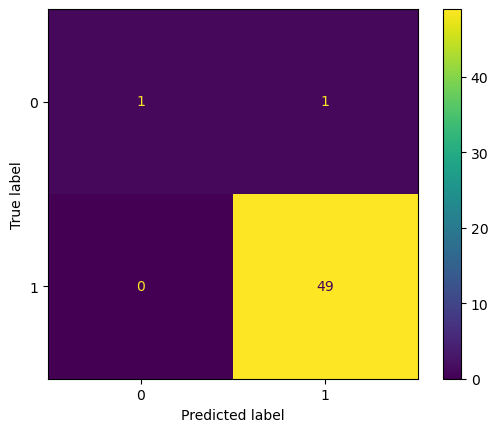

In [54]:
plot_confusion_matrix(log_model,scaled_X_test,y_test)

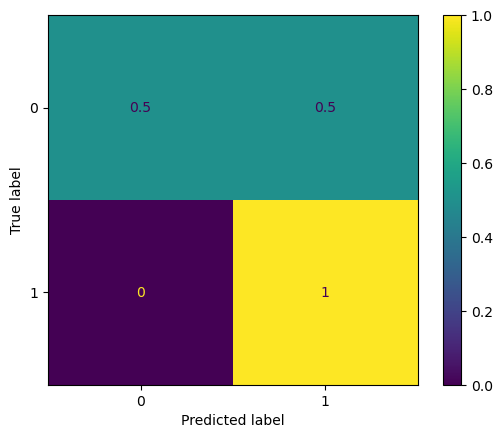

In [55]:
plot_confusion_matrix(log_model,scaled_X_test,y_test,normalize='true')

In [56]:
r2= r2_score(y_test, y_pred)

In [57]:
r2

0.47959183673469385

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.98      1.00      0.99        49

    accuracy                           0.98        51
   macro avg       0.99      0.75      0.83        51
weighted avg       0.98      0.98      0.98        51



In [59]:
from sklearn.metrics import roc_curve, auc

In [60]:
# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [61]:
# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

In [62]:
from sklearn.metrics import roc_auc_score

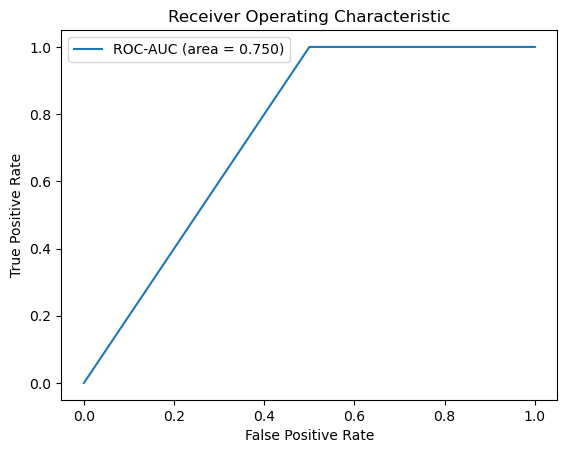

In [63]:
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label='ROC-AUC (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()

In [64]:

X = mtn.drop('Call Established/Calldrop',axis=1)
y = mtn['Call Established/Calldrop']

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [67]:

from sklearn.tree import DecisionTreeClassifier

In [68]:
model = DecisionTreeClassifier()

In [69]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
base_pred = model.predict(X_test)

In [71]:
accuracy_score(y_test,base_pred)

0.9607843137254902

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [73]:
confusion_matrix(y_test,base_pred)

array([[ 1,  1],
       [ 1, 48]], dtype=int64)

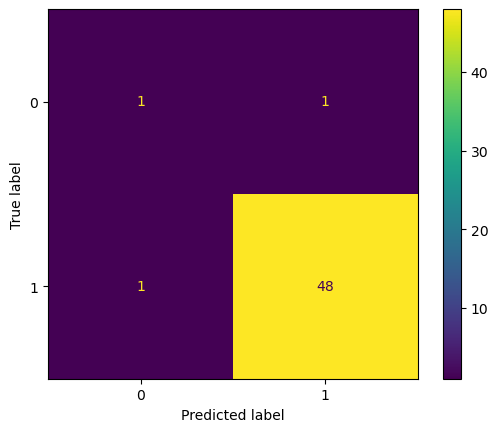

In [74]:
plot_confusion_matrix(model,X_test,y_test)

In [75]:
print(classification_report(y_test,base_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        49

    accuracy                           0.96        51
   macro avg       0.74      0.74      0.74        51
weighted avg       0.96      0.96      0.96        51



In [76]:
score1 = r2_score(y_test,base_pred)

In [77]:
score1

-0.04081632653061229

In [78]:
from sklearn.metrics import roc_curve, auc

In [79]:
# Calculate the false positive rate (FPR) and true positive rate (TPR)
fpr, tpr, thresholds = roc_curve(y_test, base_pred)

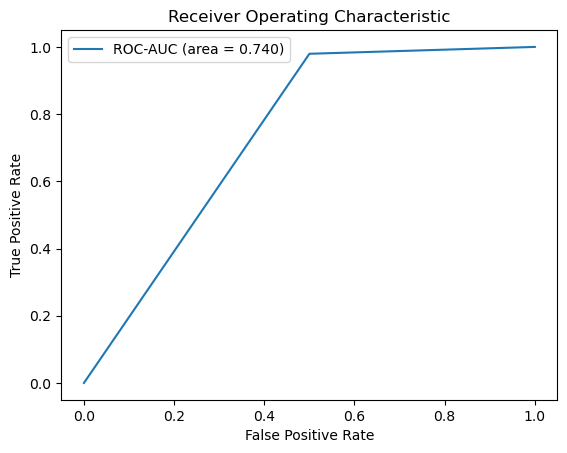

In [80]:
auc = roc_auc_score(y_test, base_pred)
plt.plot(fpr, tpr, label='ROC-AUC (area = {:.3f})'.format(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='best')
plt.show()

In [81]:
from sklearn import datasets

In [82]:

mtn = pd.read_csv('callperformance.csv')
X = mtn.drop('Call Established/Calldrop', axis=1)
y = mtn['Call Established/Calldrop']

In [83]:
mtn

,Unnamed: 0,Time,Latitude,Longitude,Call Established/Calldrop,Agg. Active RSCP (dBm),Agg. Active Ec/Io (dB),UE Received Power (RSSI - dBm): Top #1
0,0,2741.0,7.302863,5.149358,1,-79.699997,-15.7,-63.900002
1,1,2826.5,7.301352,5.151550,0,0.000000,0.0,0.000000
2,2,3225.0,7.287465,5.165219,1,-69.199997,-8.7,-60.799999
3,3,3307.0,7.286134,5.168570,0,-68.000000,3.3,0.000000
4,4,3941.0,7.281025,5.191569,1,-73.099998,-10.7,-60.400002
...,...,...,...,...,...,...,...,...
165,165,2653.0,7.267527,5.161787,1,-68.599998,3.0,0.000000
166,166,3135.0,7.275255,5.152578,1,-69.400002,3.2,0.000000
167,167,3535.0,7.286213,5.153009,1,-66.900002,3.9,0.000000
168,168,3933.0,7.296255,5.149453,1,-63.900002,3.5,0.000000


In [93]:
# Plot the bar charts
labels = ['precision', 'recall', 'f1-score']
x = np.arange(len(labels))
width = 0.35


In [ ]:
df = pd.read_csv('data_without_empty_cells.csv')

In [ ]:
df

In [ ]:

df= df.drop("Unnamed: 0", axis=1)

In [ ]:
df

In [ ]:
df.isnull().sum()

In [ ]:

df= df.drop("Ping Delay (ms)", axis=1)

In [ ]:
df.isnull().sum()

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%m/%d/%Y')


In [ ]:
df

In [ ]:
df['Time'] = pd.to_numeric(df['Time'].str.replace(':','')) 

In [ ]:
df

In [ ]:
df = pd.read_csv('FUTA and ENVIRONS.csv')

In [ ]:
df

In [ ]:
df['Time'] = pd.to_numeric(df['Time'].str.replace(':','')) 

In [ ]:
df

In [ ]:
df['Date'] = pd.to_datetime(df['Date'],format = '%m/%d/%Y')


In [ ]:
df

In [ ]:

df.isnull().sum()

In [ ]:
df = df.fillna(0)

In [ ]:

df.isnull().sum()

In [ ]:
df

In [ ]:
df.to_csv('FUTAENVIRONS.csv', index=False)


In [ ]:
df.drop("Total PDCP UL Throughput", axis=1, inplace=True)

In [ ]:
df

In [ ]:
df.drop('Date', axis =1, inplace = True)

In [ ]:
X = df.drop('Total PDCP DL Throughput',axis=1)
y = df['Total PDCP DL Throughput']

In [ ]:
df = df.astype(float)

In [ ]:
df.dtypes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
sas = LinearRegression()

In [ ]:
sas.fit(X_train,y_train)

In [ ]:
# We only pass in test features
# The model predicts its own y hat
# We can then compare these results to the true y test label value
test_pred = sas.predict(X_test)

In [ ]:
test_pred

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MAE = mean_absolute_error(y_test,test_pred)
MSE = mean_squared_error(y_test,test_pred)
RMSE = np.sqrt(MSE)

In [ ]:
MAE

In [ ]:
MSE

In [ ]:
RMSE

In [ ]:
df['Total PDCP DL Throughput'].mean()

In [ ]:
# fit the linear regression model to the data
reg = LinearRegression().fit(X, y)

In [ ]:

# make predictions with the model
test_pred = reg.predict(X)

In [ ]:

# calculate the accuracy score
scoreb = r2_score(y, test_pred)

In [ ]:
scoreb

In [ ]:
df = pd.read_csv('FUTAENVIRONS.csv')

In [ ]:
df

In [ ]:
df.drop('Date', axis =1, inplace = True)

In [ ]:
df.drop("Total PDCP DL Throughput", axis=1, inplace=True)

In [ ]:
X = df.drop('Total PDCP UL Throughput',axis=1)
y = df['Total PDCP UL Throughput']

In [ ]:
df

In [ ]:
df = df.astype(float)

In [ ]:
df.dtypes

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
X_train

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
kpk = LinearRegression()

In [ ]:
kpk.fit(X_train,y_train)

In [ ]:
test_predictions = kpk.predict(X_test)

In [ ]:
test_predictions

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
M_AE = mean_absolute_error(y_test,test_predictions)
MS_E = mean_squared_error(y_test,test_predictions)
RMS_E = np.sqrt(MSE)

In [ ]:
M_AE

In [ ]:
MS_E

In [ ]:
RMS_E

In [ ]:
df['Total PDCP UL Throughput'].mean()

In [ ]:
deg = LinearRegression().fit(X, y)

In [ ]:
y_kred = deg.predict(X)

In [ ]:
scorek = r2_score(y, y_kred)

In [ ]:
scorek 

In [ ]:
#checking out for Town 
df = pd.read_csv('TOWN.csv')

In [ ]:
df

In [ ]:
df.drop('Date', axis =1, inplace = True)

In [ ]:
df['Time'] = pd.to_numeric(df['Time'].str.replace(':','')) 

In [ ]:
df

In [ ]:
df.drop("Total PDCP UL Throughput", axis=1, inplace=True)

In [ ]:
X = df.drop('Total PDCP DL Throughput',axis=1)
y = df['Total PDCP DL Throughput']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
clc = LinearRegression()

In [ ]:
clc.fit(X_train,y_train)

In [ ]:
test_predictions = clc.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
MA_E = mean_absolute_error(y_test,test_predictions)
M_SE = mean_squared_error(y_test,test_predictions)
R_MSE = np.sqrt(MSE)

In [ ]:
MA_E

In [ ]:
M_SE

In [ ]:
R_MSE

In [ ]:
df['Total PDCP DL Throughput'].mean()

In [ ]:
Feg = LinearRegression().fit(X, y)

In [ ]:
y_Cred = Feg.predict(X)

In [ ]:
scor = r2_score(y, y_Cred)

In [ ]:
scor

In [ ]:
df = pd.read_csv('TOWN.csv')

In [ ]:
df

In [ ]:
df.drop('Date', axis =1, inplace = True)

In [ ]:
df['Time'] = pd.to_numeric(df['Time'].str.replace(':','')) 

In [ ]:
df.drop("Total PDCP DL Throughput", axis=1, inplace=True)

In [ ]:
X = df.drop('Total PDCP UL Throughput',axis=1)
y = df['Total PDCP UL Throughput']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [ ]:
clf = LinearRegression()

In [ ]:
clf.fit(X_train,y_train)

In [ ]:
test_predictions = clf.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [ ]:
maer = mean_absolute_error(y_test,test_predictions)
mser = mean_squared_error(y_test,test_predictions)
rmser = np.sqrt(MSE)

In [ ]:
maer

In [ ]:
mser

In [ ]:
rmser

In [ ]:
df['Total PDCP UL Throughput'].mean()

In [ ]:
Leg = LinearRegression().fit(X, y)

In [ ]:
y_Pre = Leg.predict(X)

In [ ]:
score2 = r2_score(y, y_Pre)

In [ ]:
score2